In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import backend as K

In [2]:
final_df_model = pd.read_csv("/kaggle/input/birdclef-2022-final-dataset/Birdclef_2022_final_df.csv")

In [3]:
final_df_model.head(50)

,primary_label,common_name,filename,ORDER1
0,afrsil1,African Silverbill,afrsil1/XC175522.ogg,Passeriformes
1,afrsil1,African Silverbill,afrsil1/XC177993.ogg,Passeriformes
2,afrsil1,African Silverbill,afrsil1/XC205893.ogg,Passeriformes
3,afrsil1,African Silverbill,afrsil1/XC207431.ogg,Passeriformes
4,afrsil1,African Silverbill,afrsil1/XC207432.ogg,Passeriformes
5,afrsil1,African Silverbill,afrsil1/XC209513.ogg,Passeriformes
6,afrsil1,African Silverbill,afrsil1/XC234994.ogg,Passeriformes
7,afrsil1,African Silverbill,afrsil1/XC317039.ogg,Passeriformes
8,afrsil1,African Silverbill,afrsil1/XC322742.ogg,Passeriformes
9,afrsil1,African Silverbill,afrsil1/XC344134.ogg,Passeriformes


In [4]:
final_df_model.value_counts()

primary_label  common_name           filename              ORDER1       
afrsil1        African Silverbill    afrsil1/XC175522.ogg  Passeriformes    1
normoc         Northern Mockingbird  normoc/XC629304.ogg   Passeriformes    1
                                     normoc/XC629310.ogg   Passeriformes    1
                                     normoc/XC629311.ogg   Passeriformes    1
                                     normoc/XC629320.ogg   Passeriformes    1
                                                                           ..
eurwig         Eurasian Wigeon       eurwig/XC605103.ogg   Anseriformes     1
                                     eurwig/XC605780.ogg   Anseriformes     1
                                     eurwig/XC606059.ogg   Anseriformes     1
                                     eurwig/XC609811.ogg   Anseriformes     1
zebdov         Zebra Dove            zebdov/XC665873.ogg   Columbiformes    1
Name: count, Length: 12608, dtype: int64

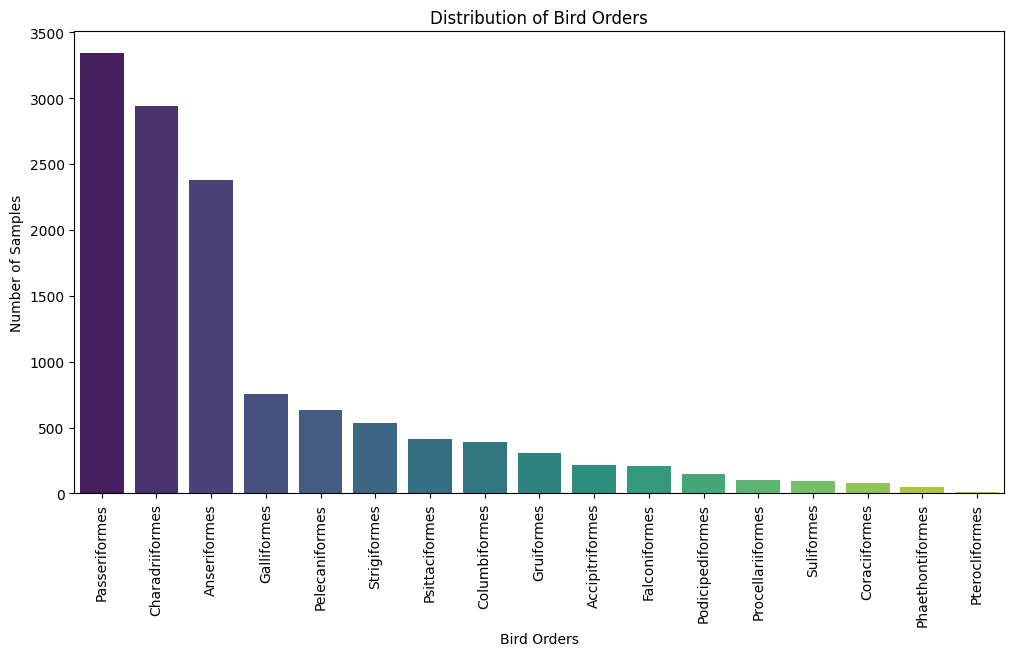

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

order_counts = final_df_model['ORDER1'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distribution of Bird Orders')
plt.xlabel('Bird Orders')
plt.ylabel('Number of Samples')
plt.show()


In [6]:
#The Focal Loss Function
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1 - K.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=1)
    
    return focal_loss_fixed

#Path to the Melspectogram directory
spectrogram_dir = '/kaggle/input/birdclef-2022-melspectogram-outputs'

def preprocess_data(df, spectrogram_dir, target_size=(224, 224)):
    images = []
    labels = []
    
    for index, row in df.iterrows():
        audio_filename = row['filename']
        bird_order = row['ORDER1']
        
        # Extract the Mel spectrogram filename by removing the species prefix
        spectrogram_filename = audio_filename.split('/')[-1].replace('.ogg', '.png')
        spectrogram_path = os.path.join(spectrogram_dir, spectrogram_filename)
        
        if os.path.exists(spectrogram_path):
            img = load_img(spectrogram_path, target_size=target_size)
            img = img_to_array(img)
            img = img / 255.0
            
            images.append(img)
            labels.append(bird_order)
    
    images = np.array(images)
    labels = np.array(labels)
    
    # Label encoding
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    
    # One-hot encoding
    labels = to_categorical(labels, num_classes=len(label_encoder.classes_))
    
    return images, labels, label_encoder.classes_

# Preprocessing the dataset
X, y, class_names = preprocess_data(final_df_model, spectrogram_dir)

#Splitting the train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

#Defining the EfficientNet model
def build_efficientnet_model(input_shape=(224, 224, 3), num_classes=len(class_names)):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    

    base_model.trainable = True
    for layer in base_model.layers[:-50]:
        layer.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    
    model.compile(optimizer=Adam(learning_rate=1e-4), loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])
    
    return model

model = build_efficientnet_model()

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

#Class weights for the imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

#Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    validation_data=(X_val, y_val),
    epochs=10, 
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=2
)

model.save('/kaggle/working/bird_order_model.h5')

#Model Evaluation
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

#Performance Metrics
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

# Macro F1 Score
f1 = f1_score(y_true, y_pred, average='macro')
print(f"Macro F1 score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


631/631 - 658s - 1s/step - accuracy: 0.0538 - loss: 0.6535 - val_accuracy: 0.1420 - val_loss: 0.6231
Epoch 2/10
631/631 - 618s - 980ms/step - accuracy: 0.0490 - loss: 0.6452 - val_accuracy: 0.0174 - val_loss: 0.6239
Epoch 3/10
631/631 - 621s - 984ms/step - accuracy: 0.0463 - loss: 0.6413 - val_accuracy: 0.0063 - val_loss: 0.6243
Epoch 4/10
631/631 - 603s - 956ms/step - accuracy: 0.0479 - loss: 0.6397 - val_accuracy: 0.0083 - val_loss: 0.6293
Epoch 5/10
631/631 - 608s - 963ms/step - accuracy: 0.0359 - loss: 0.6412 - val_accuracy: 0.0075 - val_loss: 0.6258
Epoch 6/10
631/631 - 615s - 975ms/step - accuracy: 0.0480 - loss: 0.6344 - val_accuracy: 0.0036 - val_loss: 0.6177
Epoch 7/10
631/631 - 617s - 977ms/step - accuracy: 0.0427 - loss: 0.6337 - val_accuracy: 0.0036 - val_loss: 0.6307
Epoch 8/10
631/631 - 626s - 992ms/step - accuracy: 0.0395 - loss: 0.6378 - val_accuracy: 0.0083 - val_loss: 0.6290
Epoch 9/10
631/631 - 617s - 978ms/step - accuracy: 0.0533 - loss: 0.6362 - val_accuracy: 0.016

In [7]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, roc_auc_score

# Precision
precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=1)
print(f"Macro Precision: {precision_macro:.4f}")

# Recall
recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=1)
print(f"Macro Recall: {recall_macro:.4f}")

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# AUC-ROC
auc_roc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr', average='macro')
print(f"Macro AUC-ROC: {auc_roc:.4f}")

Macro Precision: 0.9414
Macro Recall: 0.0588
Balanced Accuracy: 0.0588
Macro AUC-ROC: 0.4898
